# Exploration des données :

In [4]:
# Importation des packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Package modélisation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV




In [5]:
# Importation des données 
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv ("test.csv")
df_train.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
5,5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0
6,6,25,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0
7,7,21,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,8,37,69600,RENT,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0
9,9,35,110000,MORTGAGE,0.0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0


Description des colonnes :
- id : Identifiant unique pour chaque observation.
- person_age : Âge du demandeur de prêt.
- person_income : Revenu annuel du demandeur.
- person_home_ownership : Statut de propriété du logement (par exemple : RENT, OWN, MORTGAGE).
- person_emp_length : Nombre d'années d'emploi du demandeur.
- loan_intent : Raison du prêt (par exemple : EDUCATION, MEDICAL, VENTURE).
- loan_grade : Classement du prêt attribué (par exemple : A, B, C).
- loan_amnt : Montant demandé pour le prêt.
- loan_int_rate : Taux d'intérêt du prêt.
- loan_percent_income : Proportion du revenu du demandeur par rapport au montant du prêt.
- cb_person_default_on_file : Indicateur de défaut de paiement dans l'historique de crédit du demandeur (Y/N).
- cb_person_cred_hist_length : Durée de l'historique de crédit du demandeur (en années).
- loan_status : Statut du prêt (0 pour refusé, 1 pour approuvé).

In [6]:
df_test.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
5,58650,23,66000,RENT,5.0,EDUCATION,D,22000,14.09,0.33,N,2
6,58651,26,75000,OWN,10.0,PERSONAL,B,8000,10.62,0.11,N,4
7,58652,23,55000,MORTGAGE,6.0,PERSONAL,A,6250,6.76,0.12,N,2
8,58653,32,29124,RENT,0.0,PERSONAL,C,7200,13.11,0.26,Y,6
9,58654,22,90000,RENT,4.0,DEBTCONSOLIDATION,C,10000,13.49,0.11,Y,3


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:
#Analyse de valeurs manquantes
df_train.isna().sum()#aucune valeure manquante !

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [9]:
#Analyse des statistiques descriptives :
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


## DataViz

1. Visualisation de la distribution de la cible (loan_status) :

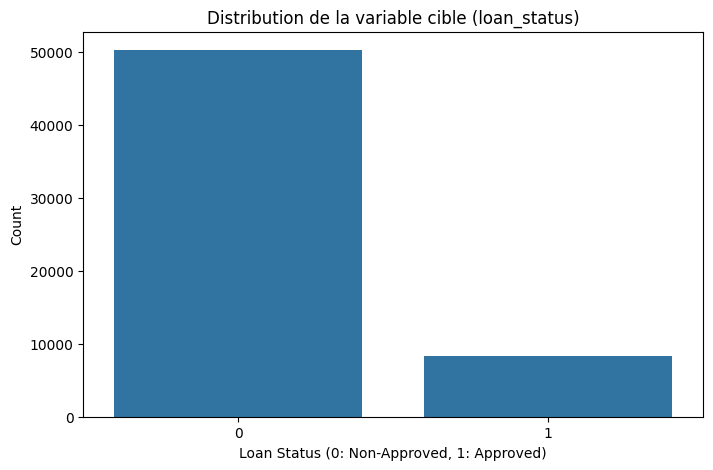

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='loan_status')
plt.title('Distribution de la variable cible (loan_status)')
plt.xlabel('Loan Status (0: Non-Approved, 1: Approved)')
plt.ylabel('Count')
plt.show()

2. Vérification des corrélations entre les variables numériques :

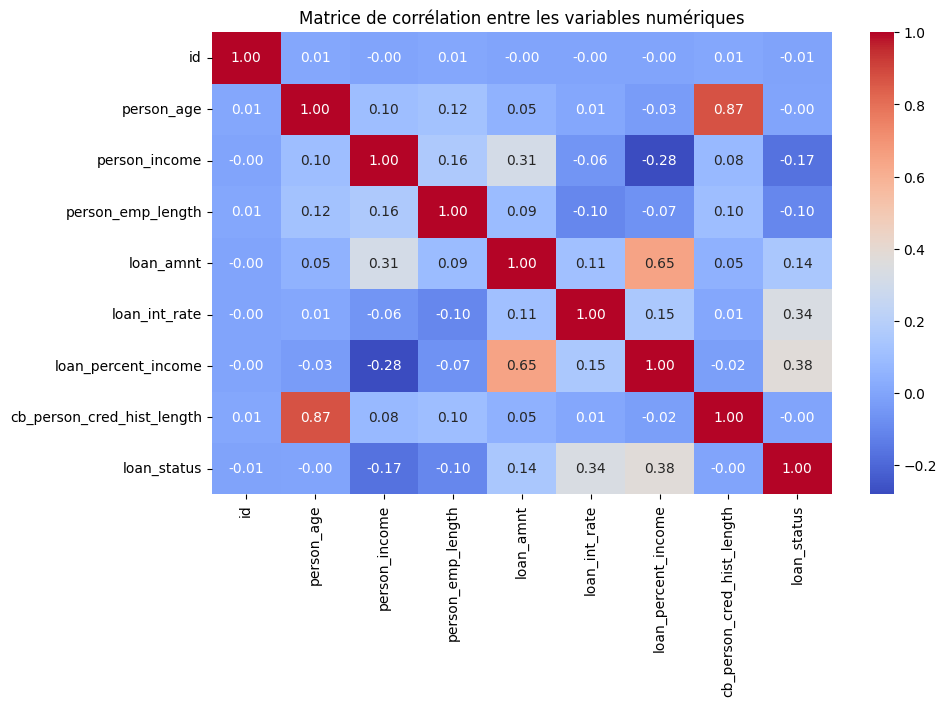

In [11]:
# Sélectionner les colonnes numériques uniquement
numerical_cols = df_train.select_dtypes(include=['int64', 'float64'])

# Calculer la matrice de corrélation
corr_matrix = numerical_cols.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()



Étape 2 : Visualisation des Relations

3) Visualisation des relations entre les caractéristiques et la cible :

Age et Loan Status :

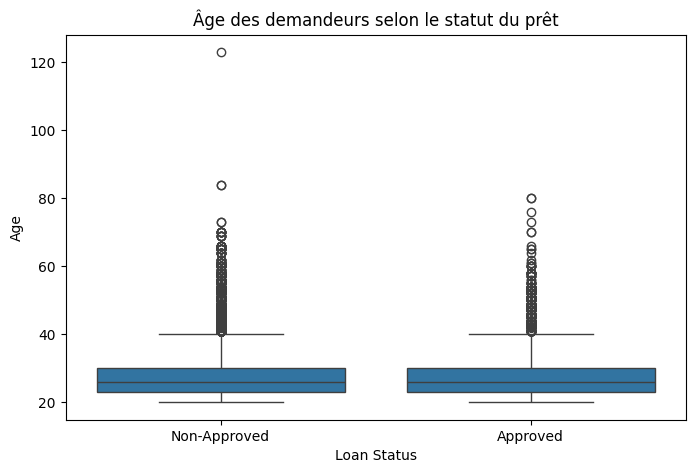

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='loan_status', y='person_age')
plt.title('Âge des demandeurs selon le statut du prêt')
plt.xlabel('Loan Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Approved', 'Approved'])
plt.show()


Revenu et Loan Status :

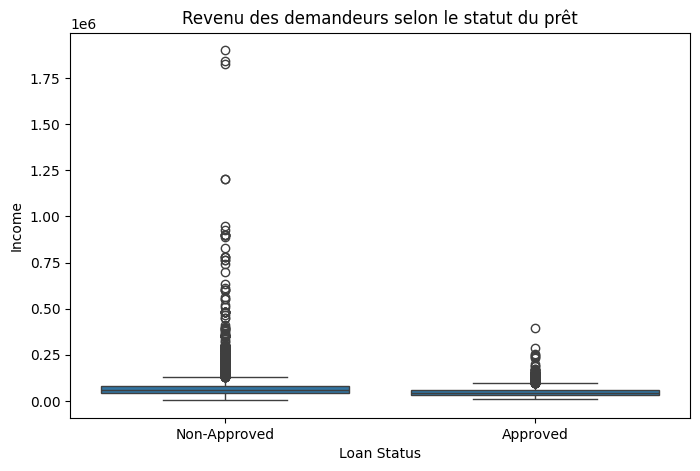

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='loan_status', y='person_income')
plt.title('Revenu des demandeurs selon le statut du prêt')
plt.xlabel('Loan Status')
plt.ylabel('Income')
plt.xticks([0, 1], ['Non-Approved', 'Approved'])
plt.show()


4) Visualisation des catégories :

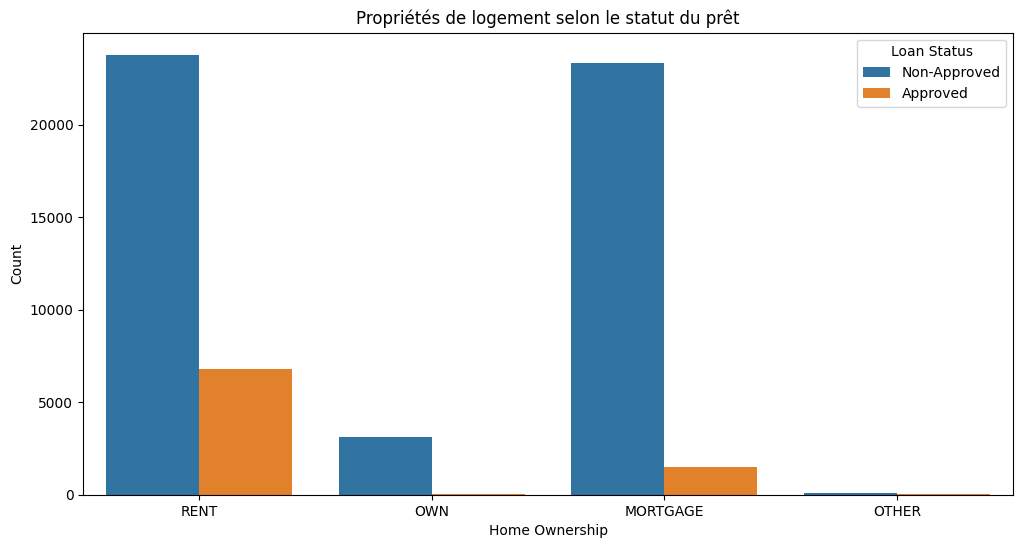

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='person_home_ownership', hue='loan_status')
plt.title('Propriétés de logement selon le statut du prêt')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Approved', 'Approved'])
plt.show()


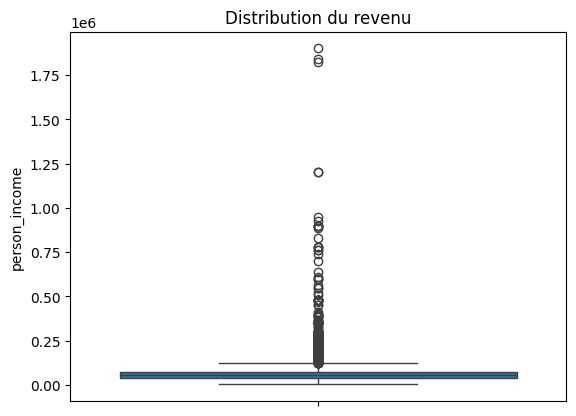

In [15]:

sns.boxplot(df_train['person_income'])
plt.title('Distribution du revenu')
plt.show()


Visualisation des distributions avec KDE (Estimation de Densité Noyau) :

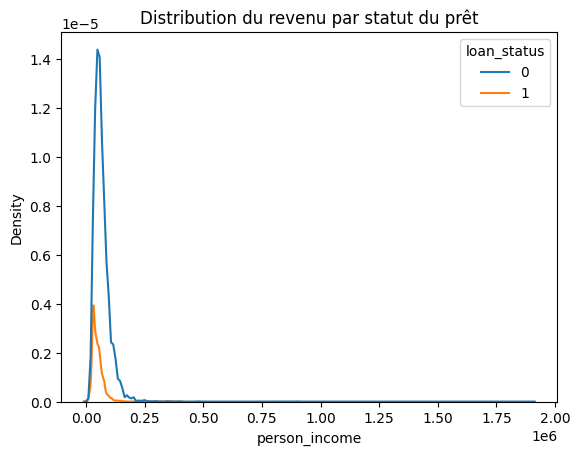

In [16]:
sns.kdeplot(df_train, x='person_income',hue='loan_status')
plt.title('Distribution du revenu par statut du prêt')
plt.show()

Statistiques sur les outliers : 
- Calculer le nombre d'observations qui sont considérées comme des outliers. Cela peut être fait en utilisant l'écart interquartile (IQR) pour définir des seuils.

In [17]:
Q1 = df_train['person_income'].quantile(0.25)
Q3 = df_train['person_income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_train[(df_train['person_income'] < (Q1 - 1.5 * IQR)) | (df_train['person_income'] > (Q3 + 1.5 * IQR))]
print(f"Nombre d'outliers dans person_income : {len(outliers)}")


Nombre d'outliers dans person_income : 2411


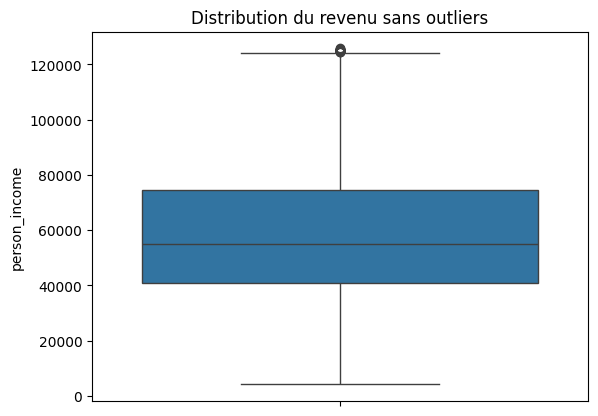

In [18]:
sns.boxplot(df_train[df_train['person_income'] < (Q3 + 1.5 * IQR)]['person_income'])
plt.title('Distribution du revenu sans outliers')
plt.show()


Distribution log-transformée :
- Si les valeurs extrêmes sont légitimes et qu'il est nécessaire de travailler avec ces données, appliquer une transformation logarithmique peut aider à normaliser la distribution.

Résumé des Étapes d'EDA :
- Visualisation de la distribution de la variable cible pour voir la balance des classes.
- Analyse descriptive pour comprendre les caractéristiques des données.
- Corrélations pour identifier les relations entre les variables.
- Visualisation des relations entre les caractéristiques et la cible pour mieux comprendre l'impact de chaque variable.

# Preprocessing de données 

Encodage des variables df_train

In [19]:
label_encoder = LabelEncoder()
df_train['person_home_ownership'] = label_encoder.fit_transform(df_train['person_home_ownership'])
df_train['loan_intent'] = label_encoder.fit_transform(df_train['loan_intent'])
df_train['loan_grade'] = label_encoder.fit_transform(df_train['loan_grade'])
df_train['cb_person_default_on_file'] = label_encoder.fit_transform(df_train['cb_person_default_on_file'])

In [20]:
df_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  int32  
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  int32  
 6   loan_grade                  58645 non-null  int32  
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  int32  
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int32(4), int64(

Encodage du dataset df_test

In [21]:
df_test['person_home_ownership'] = label_encoder.fit_transform(df_test['person_home_ownership'])
df_test['loan_intent'] = label_encoder.fit_transform(df_test['loan_intent'])
df_test['loan_grade'] = label_encoder.fit_transform(df_test['loan_grade'])
df_test['cb_person_default_on_file'] = label_encoder.fit_transform(df_test['cb_person_default_on_file'])


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  int32  
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  int32  
 6   loan_grade                  39098 non-null  int32  
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  int32  
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 3.0 MB


In [23]:
# Vérifier si les colonnes de df_train (sans la cible) et df_test correspondent
train_columns = df_train.drop(columns=['loan_status']).columns
test_columns = df_test.columns

# Vérification des différences
if set(train_columns) != set(test_columns):
    print("Les colonnes entre df_train et df_test ne correspondent pas.")
    print("Colonnes manquantes dans df_test :", set(train_columns) - set(test_columns))
    print("Colonnes supplémentaires dans df_test :", set(test_columns) - set(train_columns))
else:
    print("Les colonnes correspondent.")


Les colonnes correspondent.


5. Séparation des données en train/test (Validation) :

Avant d'entraîner ton modèle, il est nécessaire de séparer notre dataset en données d'entraînement et de test pour éviter le surapprentissage et tester la généralisation du modèle.

In [24]:
from sklearn.model_selection import train_test_split

# Séparation des données (80% train, 20% test)
X = df_train.drop('loan_status', axis=1)
y = df_train['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modélisation 

1. Choix du modèle :

Plusieurs modèles peuvent être testés, par exemple :
- Régression Logistique
- Arbres de décision
- Random Forest
- Gradient Boosting
- XGBoost
- LightGBM

1. model Logistic Regression

In [25]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
model_log_reg = LogisticRegression(max_iter=1000)
model_log_reg.fit(X, y)
log_reg_acc = cross_val_score(model_log_reg, X, y, cv=5, scoring='accuracy').mean()
log_reg_roc_auc = cross_val_score(model_log_reg, X, y, cv=5, scoring='roc_auc').mean()

print(f"Logistic Regression - Accuracy: {log_reg_acc:.4f}, ROC AUC (CV 5 folds): {log_reg_roc_auc:.4f}")

c:\Users\yacin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yacin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression - Accuracy: 0.8910, ROC AUC (CV 5 folds): 0.8673


c:\Users\yacin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimisation des hyperparamettres pour Logistic Regression

In [26]:
# Définir les hyperparamètres à tester
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

# Instancier le modèle
model_log_reg = LogisticRegression(max_iter=1000)

# Effectuer la recherche sur grille
grid_search_log_reg = GridSearchCV(model_log_reg, param_grid_log_reg, cv=5, scoring='roc_auc')
grid_search_log_reg.fit(X, y)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres pour Logistic Regression :", grid_search_log_reg.best_params_)
print("Meilleur score ROC AUC pour Logistic Regression :", grid_search_log_reg.best_score_)


Meilleurs paramètres pour Logistic Regression : {'C': 0.01, 'solver': 'liblinear'}
Meilleur score ROC AUC pour Logistic Regression : 0.7828313310748024


2. model RandomForest

In [27]:
# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X, y)
rf_acc = cross_val_score(model_rf, X, y, cv=5, scoring='accuracy').mean()
rf_roc_auc = cross_val_score(model_rf, X, y, cv=5, scoring='roc_auc').mean()

print(f"Random Forest - Accuracy: {rf_acc:.4f}, ROC AUC (CV 5 folds): {rf_roc_auc:.4f}")

Random Forest - Accuracy: 0.8035, ROC AUC (CV 5 folds): 0.9155


Optimisation des hyperparamètre pour RandomForest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Instancier le modèle
model_rf = RandomForestClassifier()

# Effectuer la recherche sur grille
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score ROC AUC :", grid_search.best_score_)


Meilleurs paramètres : {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Meilleur score ROC AUC : 0.9218400955321686


3. Model KNN

In [29]:
# KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X, y)
knn_acc = cross_val_score(model_knn, X, y, cv=5, scoring='accuracy').mean()
knn_roc_auc = cross_val_score(model_knn, X, y, cv=5, scoring='roc_auc').mean()

print(f"KNN - Accuracy: {knn_acc:.4f}, ROC AUC (CV 5 folds): {knn_roc_auc:.4f}")

KNN - Accuracy: 0.8360, ROC AUC (CV 5 folds): 0.7081


Optimisation des Hyperparamettres KNN

In [30]:
# Définir les hyperparamètres à tester
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Instancier le modèle KNN
model_knn = KNeighborsClassifier()

# Effectuer la recherche sur grille
grid_search_knn = GridSearchCV(model_knn, param_grid_knn, cv=5, scoring='roc_auc')
grid_search_knn.fit(X, y)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres pour KNN :", grid_search_knn.best_params_)
print("Meilleur score ROC AUC pour KNN :", grid_search_knn.best_score_)


Meilleurs paramètres pour KNN : {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Meilleur score ROC AUC pour KNN : 0.7729494306942333


5. Modèl Decision Tree

In [31]:
# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X, y)
dt_acc = cross_val_score(model_dt, X, y, cv=5, scoring='accuracy').mean()
dt_roc_auc = cross_val_score(model_dt, X, y, cv=5, scoring='roc_auc').mean()

print(f"Decision Tree - Accuracy: {dt_acc:.4f}, ROC AUC (CV 5 folds): {dt_roc_auc:.4f}")

Decision Tree - Accuracy: 0.7398, ROC AUC (CV 5 folds): 0.7076


Optimisation des Hyperparamettres pour DécisionTREE

In [32]:
# Définir les hyperparamètres à tester
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Instancier le modèle d'arbre de décision
model_dt = DecisionTreeClassifier()

# Effectuer la recherche sur grille
grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=5, scoring='roc_auc')
grid_search_dt.fit(X, y)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres pour Decision Tree :", grid_search_dt.best_params_)
print("Meilleur score ROC AUC pour Decision Tree :", grid_search_dt.best_score_)


Meilleurs paramètres pour Decision Tree : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Meilleur score ROC AUC pour Decision Tree : 0.8563061529788618


6. Modèle XGBOOST

In [33]:
# XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X, y)
xgb_acc = cross_val_score(model_xgb, X, y, cv=5, scoring='accuracy').mean()
xgb_roc_auc = cross_val_score(model_xgb, X, y, cv=5, scoring='roc_auc').mean()

print(f"XGBoost - Accuracy: {xgb_acc:.4f}, ROC AUC (CV 5 folds): {xgb_roc_auc:.4f}")

c:\Users\yacin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\yacin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\yacin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

XGBoost - Accuracy: 0.9330, ROC AUC (CV 5 folds): 0.9462


Optimisation des hyperparamètre pour GXBOOST

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Instancier le modèle
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Effectuer la recherche sur grille
grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=5, scoring='roc_auc')
grid_search_xgb.fit(X, y)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres XGBoost :", grid_search_xgb.best_params_)
print("Meilleur score ROC AUC XGBoost :", grid_search_xgb.best_score_)


c:\Users\yacin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\yacin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\yacin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Meilleurs paramètres XGBoost : {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Meilleur score ROC AUC XGBoost : 0.9510177616731941


7. Modèle LightGBM 

In [35]:
from lightgbm import LGBMClassifier

# Initialiser le modèle LightGBM
model_lgbm = LGBMClassifier()

# Entraînement du modèle
model_lgbm.fit(X_train, y_train)

# Évaluation du modèle avec cross-validation
lgbm_acc = cross_val_score(model_lgbm, X_train, y_train, cv=5, scoring='accuracy').mean()
lgbm_roc_auc = cross_val_score(model_lgbm, X_train, y_train, cv=5, scoring='roc_auc').mean()

print(f"LightGBM - Accuracy: {lgbm_acc:.4f}, ROC AUC (CV 5 folds): {lgbm_roc_auc:.4f}")


ModuleNotFoundError: No module named 'lightgbm'

On à un meilleur résultat avec ce modèles que les autres.

Usage des Piplines 

In [ ]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Supposons que tu aies déjà X et y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un pipeline avec LGBMClassifier
pipeline_lgbm = Pipeline(steps=[
    ('classifier', LGBMClassifier(objective='binary', metric='auc'))
])

# Entraîner le modèle
pipeline_lgbm.fit(X_train, y_train)

# Prédictions
y_pred = pipeline_lgbm.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pipeline_lgbm.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")


[LightGBM] [Info] Number of positive: 6708, number of negative: 40208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142979 -> initscore=-1.790765
[LightGBM] [Info] Start training from score -1.790765
Accuracy: 0.9525, ROC AUC: 0.9580


In [ ]:
# On remarque une amélioration des résultats !

Optimisation des hyperparamettres 

In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# Échantillonner les données
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42)

# Définir le modèle
model = LGBMClassifier()
model.fit(X_sample, y_sample)

# Prédictions
y_pred = model.predict(X_sample)
accuracy = accuracy_score(y_sample, y_pred)
roc_auc = roc_auc_score(y_sample, model.predict_proba(X_sample)[:, 1])

print(f"Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")


[LightGBM] [Info] Number of positive: 857, number of negative: 5007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1003
[LightGBM] [Info] Number of data points in the train set: 5864, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146146 -> initscore=-1.765154
[LightGBM] [Info] Start training from score -1.765154
Accuracy: 0.9841, ROC AUC: 0.9992


In [ ]:
# Sur un petit échantiant on pu avoir un sccore parfait !

In [ ]:
from imblearn.over_sampling import SMOTE

# Création d'une instance de SMOTE
smote = SMOTE(random_state=42)

# Application de SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)


Cela va générer de nouvelles instances pour la classe minoritaire, ce qui peut améliorer la performance de ton modèle.

# Prediction sur le Test_csv

1. Prédiction RandomForest

In [ ]:
# Meilleurs paramètres pour RandomForest
best_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2
)

# Entraînement du modèle sur df_train
best_model.fit(X_train, y_train)

# Faire des prédictions sur df_test
y_test_pred_proba = best_model.predict_proba(df_test)[:, 1]  # Obtenir les probabilités

# Créer un fichier de soumission
submission = pd.DataFrame({
    'id': df_test['id'],  
    'loan_status': y_test_pred_proba  # Utiliser les probabilités ici
})

# Sauvegarder le fichier de soumission
chemin_fichier = '/kaggle/working/submission.csv'
submission.to_csv(chemin_fichier, index=False)
print(f"Fichier de soumission créé avec succès dans {chemin_fichier}")


Fichier de soumission créé avec succès dans /kaggle/working/submission.csv


In [ ]:
# Afficher les 20 premières lignes des prédictions
result = pd.DataFrame({
    'id': df_test['id'],
    'loan_status_pred': y_test_pred_proba
})
print(result.head(20))

       id  loan_status_pred
0   58645              0.97
1   58646              0.07
2   58647              0.49
3   58648              0.17
4   58649              0.10
5   58650              0.90
6   58651              0.10
7   58652              0.03
8   58653              0.33
9   58654              0.06
10  58655              0.17
11  58656              0.22
12  58657              0.12
13  58658              0.03
14  58659              0.26
15  58660              0.36
16  58661              0.14
17  58662              0.04
18  58663              0.15
19  58664              0.15


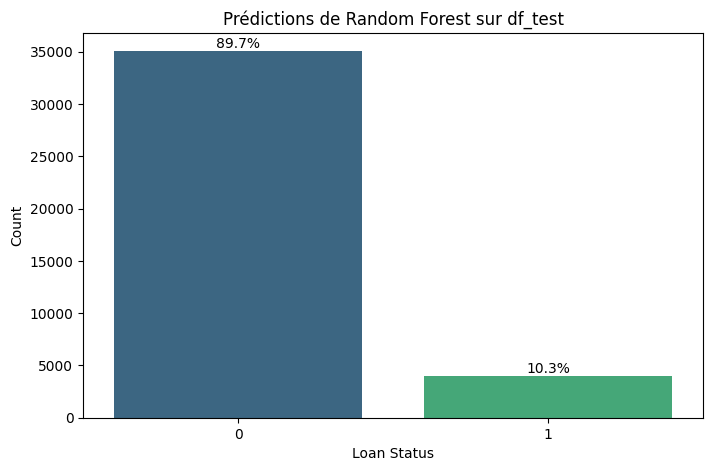

In [ ]:
# Prédictions sur df_test
y_test_pred = best_model.predict(df_test)

# Affichage des résultats
result_counts = pd.Series(y_test_pred).value_counts()

# Créer un graphique à barres
plt.figure(figsize=(8, 5))
sns.barplot(x=result_counts.index, y=result_counts.values, palette='viridis')

# Ajouter les labels et le titre
plt.title('Prédictions de Random Forest sur df_test')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=result_counts.index, labels=result_counts.index, rotation=0)

# Ajouter le pourcentage au-dessus de chaque barre
total_count = result_counts.sum()
for index, value in enumerate(result_counts):
    percentage = (value / total_count) * 100
    plt.text(index, value, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

2. Prédiction XGBOOST

In [ ]:
from xgboost import XGBClassifier

# Meilleurs paramètres pour XGBoost
best_model_xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Entraînement du modèle sur les données d'entraînement
best_model_xgb.fit(X_train, y_train)

# Faire des prédictions sur df_test
y_test_pred_proba_xgb = best_model_xgb.predict_proba(df_test)[:, 1]  # Obtenir les probabilités

# Créer un fichier de soumission pour XGBoost
submission_xgb = pd.DataFrame({
    'id': df_test['id'],  
    'loan_status': y_test_pred_proba_xgb
})

# Sauvegarder le fichier de soumission en CSV
submission_xgb.to_csv('submission_XGBoost.csv', index=False)

print("Fichier de soumission XGBoost créé avec succès.")


Fichier de soumission XGBoost créé avec succès.


In [ ]:
# Afficher les 20 premières lignes des prédictions XGBoost
result_xgb = pd.DataFrame({
    'id': df_test['id'],
    'loan_status_pred': y_test_pred_proba_xgb
})
print(result_xgb.head(20))

       id  loan_status_pred
0   58645          0.816106
1   58646          0.067144
2   58647          0.472588
3   58648          0.060048
4   58649          0.297620
5   58650          0.817446
6   58651          0.044800
7   58652          0.046190
8   58653          0.167488
9   58654          0.071189
10  58655          0.110252
11  58656          0.121781
12  58657          0.069236
13  58658          0.044800
14  58659          0.061748
15  58660          0.112665
16  58661          0.053057
17  58662          0.055521
18  58663          0.060296
19  58664          0.052501


loan_status_pred
0.044800    5542
0.053057    3137
0.061134    1504
0.042611    1287
0.092073    1163
            ... 
0.066802       1
0.086473       1
0.196580       1
0.052647       1
0.393581       1
Name: count, Length: 1905, dtype: int64


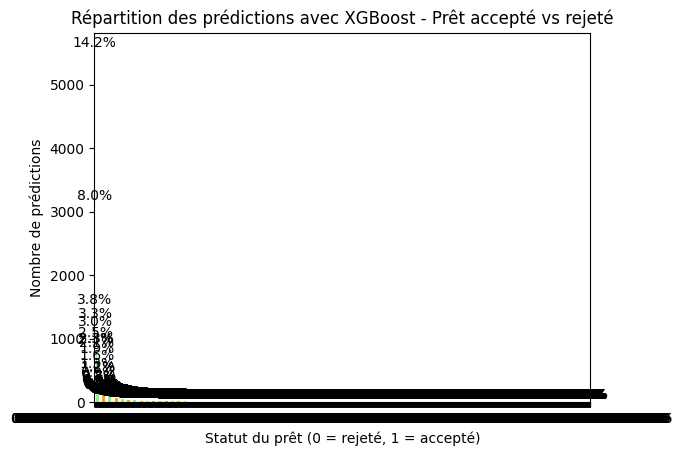

In [ ]:
# Créer un DataFrame pour résumer les prédictions XGBoost
predictions_summary_xgb = result_xgb['loan_status_pred'].value_counts()

# Calculer les pourcentages pour chaque classe
percentages = predictions_summary_xgb / predictions_summary_xgb.sum() * 100

# Afficher les valeurs des prédictions
print(predictions_summary_xgb)

# Créer un graphique à barres pour XGBoost
ax = predictions_summary_xgb.plot(kind='bar', color=['lightgreen', 'orange'])

# Ajouter les pourcentages ou les valeurs au-dessus des barres
for i in ax.containers:
    ax.bar_label(i, labels=[f'{val:.1f}%' for val in percentages], label_type='edge')

# Ajouter les titres et étiquettes
plt.title('Répartition des prédictions avec XGBoost - Prêt accepté vs rejeté')
plt.xlabel('Statut du prêt (0 = rejeté, 1 = accepté)')
plt.ylabel('Nombre de prédictions')
plt.xticks(rotation=0)

# Afficher le graphique
plt.show()

In [ ]:
import pandas as pd
from lightgbm import LGBMClassifier


# Entraîner le modèle avec les meilleurs hyperparamètres
best_model = LGBMClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=-1,
    num_leaves=31
)

# Entraîner le modèle sur df_train
best_model.fit(X, y)

# Faire des prédictions sur df_test
y_test_pred_proba = best_model.predict_proba(df_test)[:, 1]

# Créer un fichier de soumission
submission = pd.DataFrame({
    'id': df_test['id'],  # Assure-toi que df_test a une colonne 'id'
    'loan_status': y_test_pred_proba
})

# Sauvegarder le fichier de soumission
submission.to_csv('submission_LightGBM.csv', index=False)
print("Fichier de soumission créé avec succès.")
print(submission.head())

[LightGBM] [Info] Number of positive: 8350, number of negative: 50295
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 58645, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142382 -> initscore=-1.795644
[LightGBM] [Info] Start training from score -1.795644
Fichier de soumission créé avec succès.
      id  loan_status
0  58645     0.995029
1  58646     0.028863
2  58647     0.445548
3  58648     0.020481
4  58649     0.094844


## Optimiser Tous les Modèles

### Conclusion sur le Choix du Modèle
Choisir Random Forest pour les prédictions sur df_test est judicieux, notamment parce que ce modèle excelle dans la gestion de datasets comportant de nombreuses variables, tout en offrant des performances solides grâce à son approche basée sur des arbres décisionnels multiples. De plus, il est capable de capter des relations complexes et des interactions entre les variables sans nécessiter de transformation extensive des données.


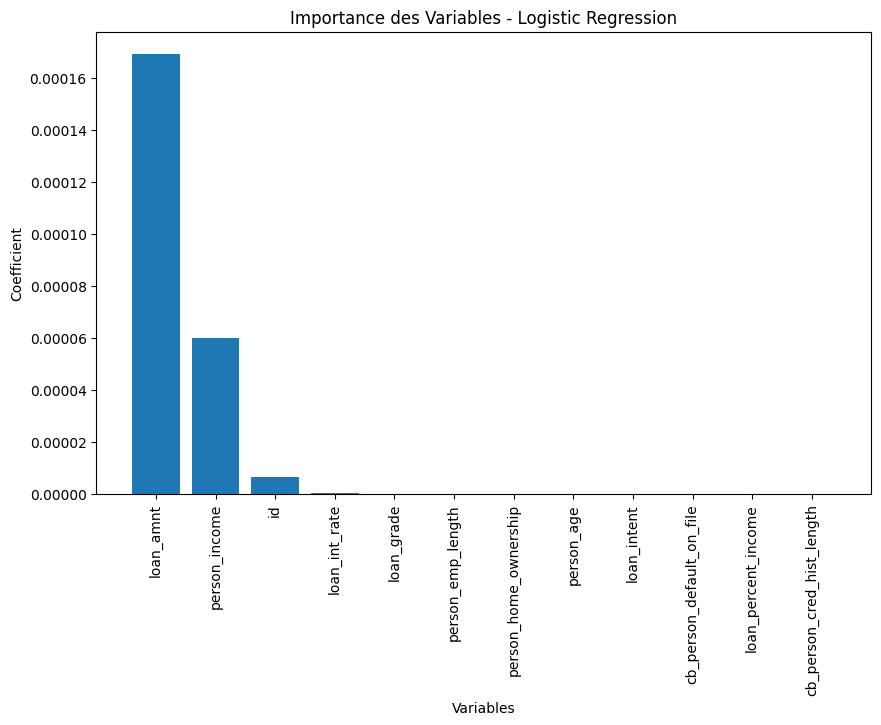

In [ ]:
# Afficher l'importance des variables pour la régression logistique
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X, y)

# Importance des variables à partir des coefficients
importances = np.abs(logistic_model.coef_[0])
indices = np.argsort(importances)[::-1]

# Tracer l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des Variables - Logistic Regression")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Coefficient")
plt.xlabel("Variables")
plt.show()

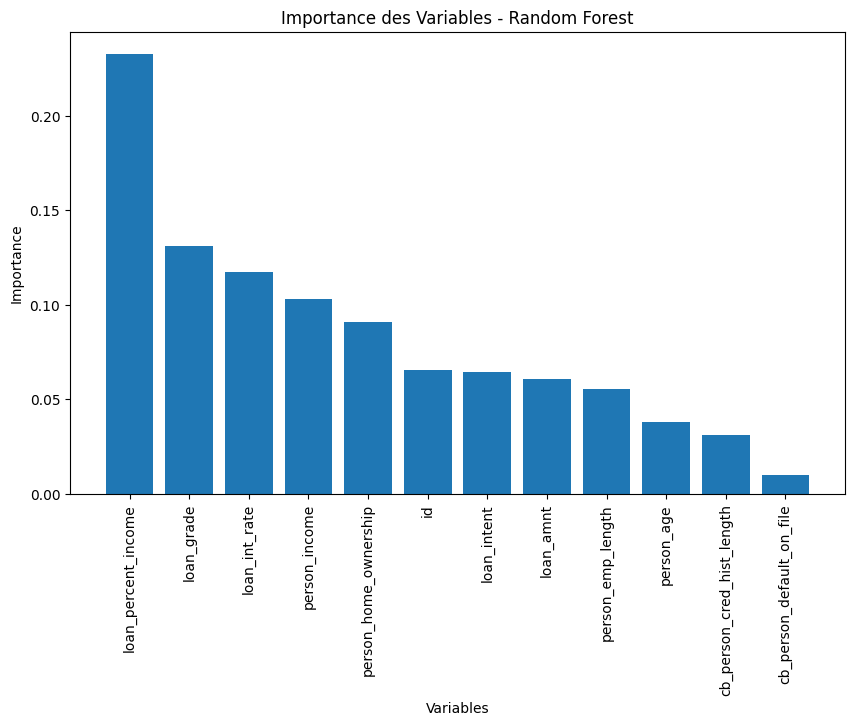

In [ ]:
# Afficher l'importance des variables pour Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X, y)

# Importance des variables
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Tracer l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des Variables - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Variables")
plt.show()

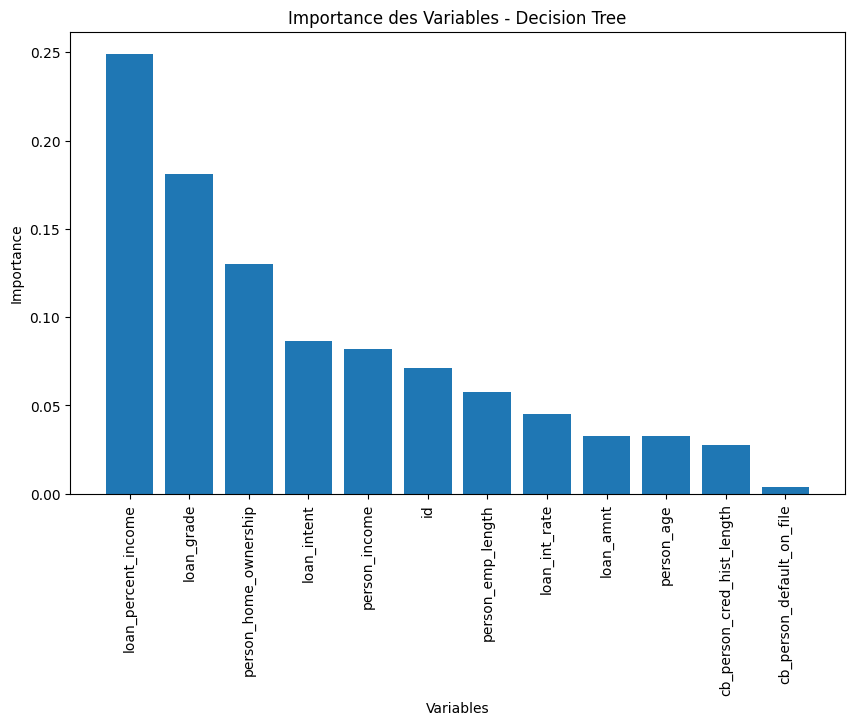

In [ ]:
# Afficher l'importance des variables pour Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X, y)

# Importance des variables
importances = decision_tree_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Tracer l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des Variables - Decision Tree")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Variables")
plt.show()

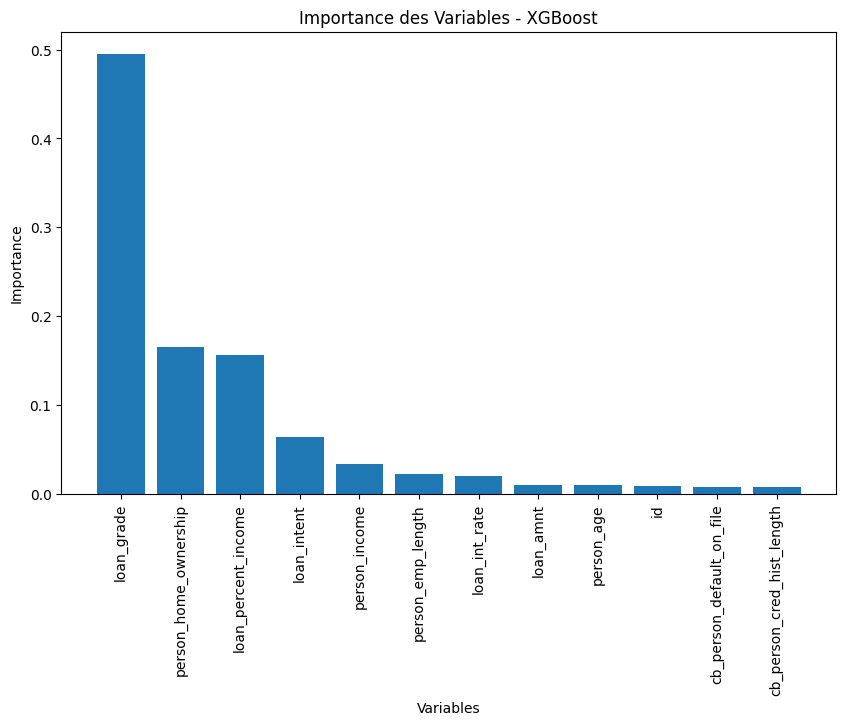

In [ ]:
# Afficher l'importance des variables pour XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)

# Importance des variables
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Tracer l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des Variables - XGBoost")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Variables")
plt.show()